# Lab 6. Cauchy Problem Solving with Runge-Kutta and Adams methods.


In [31]:
from math import *
import numpy as np
import scipy as scp
import scipy.integrate as intgr
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
h = 0.1

Методами Рунге-Кутта та Адамса-Башфорта четвертого порядку розв'язати задачу Коші. На початку інтервалу у необхідній кількості точок значення для методу Адамса визначити методом Рунге-Кутта четвертого порядку.

In [33]:
num = 15

In [34]:
def f(x, y):
    return (1 - x ** 2) * y + (2*x) - (x**2) + (x**4)

In [35]:
def Runge_Kutt(h, num):
    #x = h*np.linspace(0, 5, num)
    x = [float(i)*h for i in range(31)]
    y = [0]
    for i in x:
        k1 = h * f(i, y[-1])
        k2 = h * f(i + h / 2, y[-1] + k1 / 2)
        k3 = h * f(i + h / 2, y[-1] + k2 / 2)
        k4 = h * f(i + h, y[-1] + k3)
        y.append(y[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
    return zip(x, y)

In [36]:
Runge_Kutt(h, num)

[(0.0, 0),
 (0.1, 0.009999763608085938),
 (0.2, 0.039999476978140866),
 (0.30000000000000004, 0.08999915157291752),
 (0.4, 0.1599988019760551),
 (0.5, 0.2499984454142123),
 (0.6000000000000001, 0.35999810127286574),
 (0.7000000000000001, 0.48999779070409133),
 (0.8, 0.6399975364627006),
 (0.9, 0.8099973631332054),
 (1.0, 0.99999729791053),
 (1.1, 1.2099973720594726),
 (1.2000000000000002, 1.4399976230951068),
 (1.3, 1.6899980976039948),
 (1.4000000000000001, 1.9599988544852625),
 (1.5, 2.249999968266975),
 (1.6, 2.5600015320894753),
 (1.7000000000000002, 2.8900036599790955),
 (1.8, 3.240006488175468),
 (1.9000000000000001, 3.6100101755016696),
 (2.0, 4.000014903022604),
 (2.1, 4.410020873448856),
 (2.2, 4.8400283108442705),
 (2.3000000000000003, 5.290037461154802),
 (2.4000000000000004, 5.7600485939130746),
 (2.5, 6.250062005251285),
 (2.6, 6.760078022157327),
 (2.7, 7.290097007804485),
 (2.8000000000000003, 7.8401193678054275),
 (2.9000000000000004, 8.410145557375557),
 (3.0, 9.000176

In [37]:
y_R = []
for i in Runge_Kutt(h, num):
    y_R.append(i[1])

In [38]:
def Adams_Bashforth(h, num):
    runge_kutt = Runge_Kutt(h, num)[:4]
    #x = np.linspace(0, 5, num)
    x = [float(i)*h for i in range(31)]
    y = [i[1] for i in runge_kutt]
    for i in range(3, len(x)):
        y.append(y[i] + (55 * f(x[i], y[i]) -
                         59 * f(x[i - 1], y[i - 1]) +
                         37 * f(x[i - 2], y[i - 2]) -
                         9 * f(x[i - 3], y[i - 3])) * h / 24)
    return zip(x, y)

In [39]:
Adams_Bashforth(h, num)

[(0.0, 0),
 (0.1, 0.009999763608085938),
 (0.2, 0.039999476978140866),
 (0.30000000000000004, 0.08999915157291752),
 (0.4, 0.1599990619943626),
 (0.5, 0.24999900259730057),
 (0.6000000000000001, 0.35999892466841327),
 (0.7000000000000001, 0.48999885833008083),
 (0.8, 0.6399988083054023),
 (0.9, 0.8099987750800319),
 (1.0, 0.9999987632541076),
 (1.1, 1.2099987761634647),
 (1.2000000000000002, 1.4399988152685277),
 (1.3, 1.689998880275945),
 (1.4000000000000001, 1.9599989688055648),
 (1.5, 2.24999907646172),
 (1.6, 2.5599991972176466),
 (1.7000000000000002, 2.889999324060637),
 (1.8, 3.2399994498103646),
 (1.9000000000000001, 3.609999567961016),
 (2.0, 3.999999673392306),
 (2.1, 4.4099997628197),
 (2.2, 4.839999834918805),
 (2.3000000000000003, 5.28999989013423),
 (2.4000000000000004, 5.759999930253663),
 (2.5, 6.249999957866743),
 (2.6, 6.759999975834259),
 (2.7, 7.2899999868623375),
 (2.8000000000000003, 7.839999993232924),
 (2.9000000000000004, 8.409999996689852),
 (3.0, 8.99999999845

#### Runge-Kutta (https://rosettacode.org/wiki/Runge-Kutta_method#Python)
#### Adams-Bashforth(http://www.dam.brown.edu/people/sahn/html/ab4.html)

In [40]:
#x = np.linspace(0, 5, num)
x = [float(i)*h for i in range(31)]
y = []
for i in x:
    y.append(i**2)

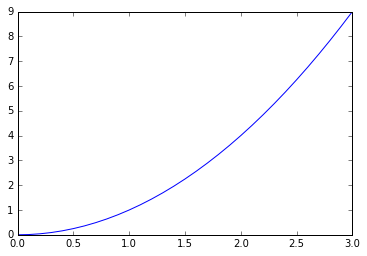

In [41]:
plt.plot(x, y)
plt.show()

In [42]:
y_A = []
for i in Adams_Bashforth(h, num):
    y_A.append(i[1])

In [43]:
f = lambda y, x: (1 - x**2)*y + (2*x) - (x**2) + (x**4)
y0, x0 = 0.0, 0.0
h = 0.1
#x = np.linspace(0, 5, num)
x = [float(i)*h for i in range(31)]
sol = intgr.odeint(f, y0, x)
sol[:,0]

array([ 0.  ,  0.01,  0.04,  0.09,  0.16,  0.25,  0.36,  0.49,  0.64,
        0.81,  1.  ,  1.21,  1.44,  1.69,  1.96,  2.25,  2.56,  2.89,
        3.24,  3.61,  4.  ,  4.41,  4.84,  5.29,  5.76,  6.25,  6.76,
        7.29,  7.84,  8.41,  9.  ])

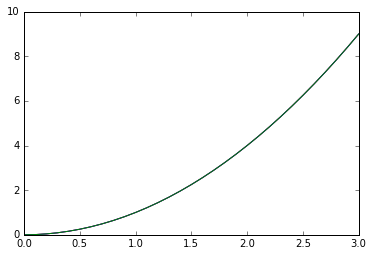

In [47]:
plt.plot(x,y, 'red',x, y_A,x, y_R)
plt.show()

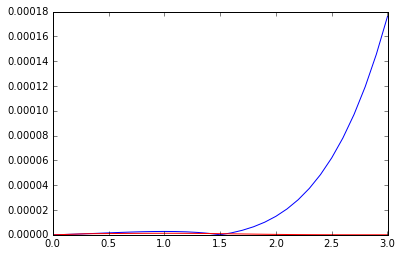

In [46]:
y_Adams = []
y_Runge = []
for i in range(0, len(y), 1):
    y_Adams.append(abs(y[i] - y_A[i]))
    y_Runge.append(abs(y[i] - y_R[i]))
plt.plot(x,y_nn, x, y_n, 'red')
plt.show()